<a href="https://colab.research.google.com/github/Smartmind12/Image-Processing/blob/main/Utsav_Image_Processing_FFT_%26_Hadamard_Tranform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: UTSAV PAUL

Aim:
a. To write a program in PYTHON to implement FFT and IFFT on an image

b. To write a program in PYTHON implement LPF and HPF in frequency domain on an image

#FOURIER AND LOG TRANSFORM

In [ ]:
#Importing all the necessary libraries
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#Reading the input image 
image1 = cv2.imread("/content/Fig0333(a)(test_pattern_blurring_orig).tif", 0)
#Applying Fast Fourier Transform on original image
img_fft= np.fft.fft2(image1, s=None, axes=(-2, -1), norm=None)
#Finding out the shape of the image after FFT
[m,n]= img_fft.shape
print(m,n)

500 500


In [ ]:
#Shifting of the origin by multiplying equivalent by (-1)^x+y
img_fft= np.fft.fftshift(img_fft) 
#Obtaining magintude of the transformed image
img_abs= np.abs(img_fft) 
#Obtaining the Phase of the trasnformed image
img_phase= np.angle(img_fft) 
# Performing Log transformation
img_log= np.log10(1+img_abs) 

Text(0.5, 1.0, 'Log Transformation of the original image')

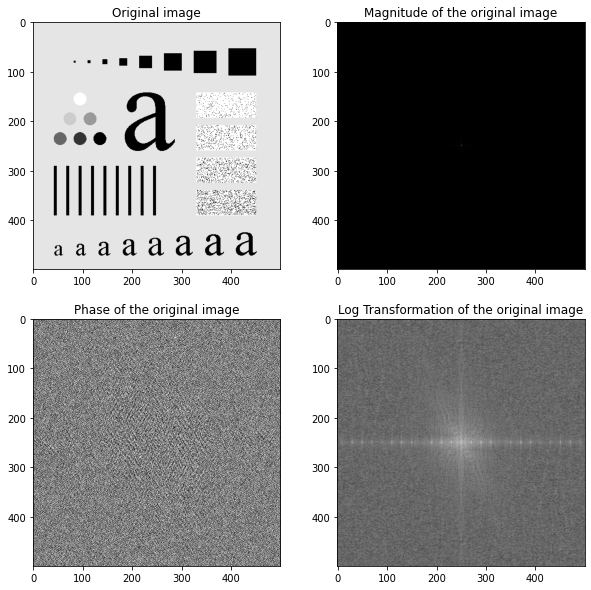

In [ ]:
#Plotting and Displaying of the Transformed Images 
fig = plt.figure(figsize=(10,10),facecolor='w')
plt.subplot(2,2,1)
plt.imshow(image1, cmap="gray")
plt.title("Original image")
plt.subplot(2,2,2)
plt.imshow(img_abs, "gray")
plt.title("Magnitude of the original image")
plt.subplot(2,2,3)
plt.imshow(img_phase, "gray")
plt.title("Phase of the original image")
plt.subplot(2,2,4)
plt.imshow(img_log, "gray")
plt.title("Log Transformation of the original image")

Here we find that in magnitude function rejecting the phase information in Fourier space leads to a spatial redistribution of the intensity in real space while in the Phase funtion we are normalizing the amplitudes of each pixel to 1, so the total intensity of the image will be changed. While in log transformation dark pixels are expanded as compared to higher pixel values.

#IDEAL LPF & HPF FILTERING

In [ ]:
#Taking the input image for the filtering
lowpassf= image1.copy()
highpassf= image1.copy()
#Taking Radius of Mask any input value 30,60,90,160,460
radius1= int(input("Radius OF Mask= "))
#Creating Ideal LPF and Ideal HPF masks
for i in range(m):
  for j in range(n):
    radius2= np.sqrt((i-m//2)**2 +(j-n//2)**2)
    if radius2>radius1:
      lowpassf[i,j]=0
      highpassf[i,j]=1
    else:
      lowpassf[i,j]=1
      highpassf[i,j]=0

Radius OF Mask= 30


Here using Ideal Low Pass filter we simply cutoff all high frequency components that are specifed distance radius1 from the origin of the transform. In High pass filter we sharpen the image by removing all the low frequency components outside radius1.  

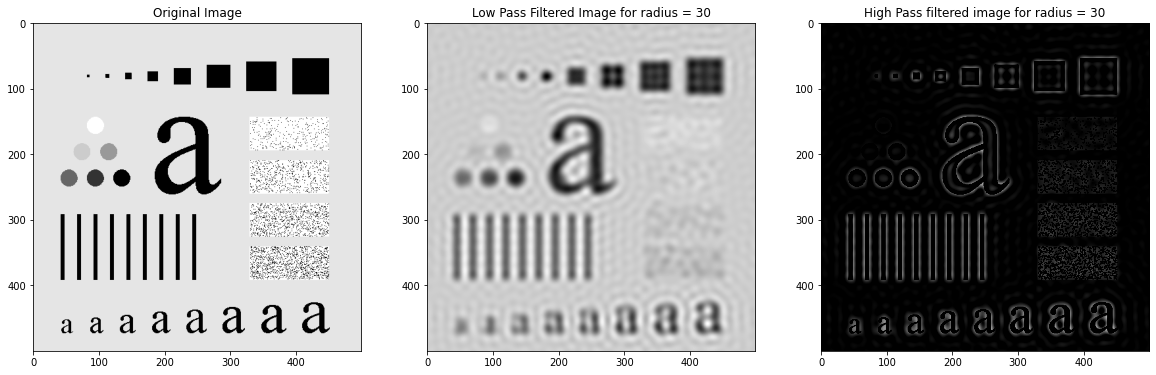

In [ ]:
#Low Pass Filter Mask with the FFT image
image_lowpassf= img_fft*lowpassf 
#Shifting of the origin wrt radius of image
image_lowpassf= np.fft.fftshift(image_lowpassf)
img_new_lowpassf= np.real(np.fft.ifft2(image_lowpassf))

#High Pass Filter Mask with the FFT image
image_highpassf= img_fft*highpassf 
image_highpassf= np.fft.fftshift(image_highpassf)
img_new_highpassf= np.real(np.fft.ifft2(image_highpassf))

#Plot Original image, Low Pass Filtered and High Pass Filtered image
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image1,cmap="gray")
plt.subplot(1,3,2)
plt.title("Low Pass Filtered Image for radius = " +str(radius1))
plt.imshow(img_new_lowpassf,cmap="gray")
plt.subplot(1,3,3)
plt.title("High Pass filtered image for radius = " +str(radius1))
plt.imshow(img_new_highpassf,cmap="gray", vmin=0, vmax=255)

In LPF, when 1 is placed inside and the 0 is placed outside, we obtain a blurred image. Now as we increase the size of 1, blurring would be increased and the edge content would be reduced.While in HPF, when 0 is placed inside, we get edges, which gives us a sketched image. 

#Walsh Hadamard Transformation

In [ ]:
#Hadamard function from scipy library
from scipy.linalg import hadamard
N= int(input("Enter matrix order: "))
print(hadamard(N))

Enter matrix order: 8
[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


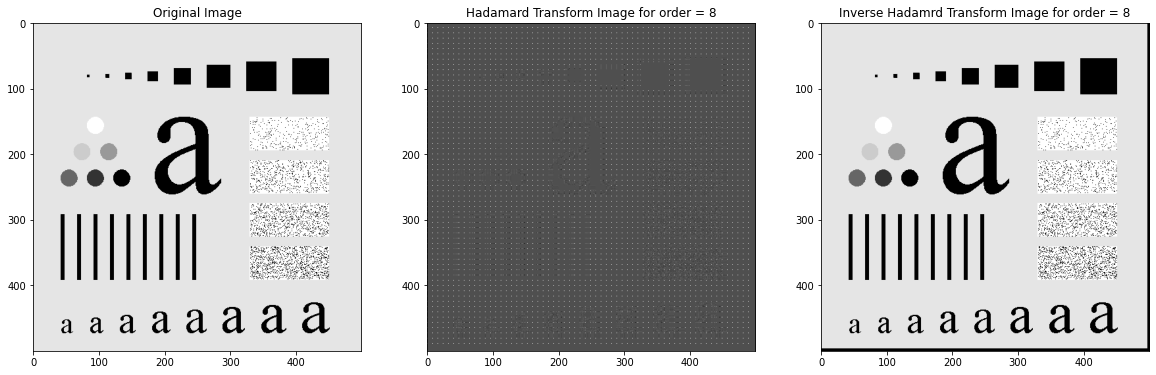

In [ ]:
#Implementing Hadamard on a given NxN matrix
matrix= np.random.randint(9, size= (N,N)) #Returning random values in matrix
#Creating Callable Hadamard Function
def imghad(f):
  H=hadamard(8)
#Matrix multiplication
  matrix_hadamard= np.dot(H,f) #Inner Product of two vectors
  matrix_hadamard2= np.dot(matrix_hadamard,H)
  return(matrix_hadamard2)
#Defining the Hadamard Image
imagehadamard = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imagehadamard[row*N:(row+1)*N,col*N:(col+1)*N]= imghad(image1[row*N:(row+1)*N,col*N:(col+1)*N])

# Implementing Inverse Hadamard transform on a given NxN matrix
def invimghad(F):
  H=hadamard(N)
#Matrix multiplication  
  matrix_inv= np.dot(H,F)
  matrix_inv2=np.dot(matrix_inv,H)
  matrix_inv3=matrix_inv2//(N*N)
  return(matrix_inv3)
#Defining the Inverse Hadamard Image
imginv = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imginv[row*N:(row+1)*N,col*N:(col+1)*N]= invimghad(imagehadamard[row*N:(row+1)*N,col*N:(col+1)*N])

#Plot Original image, Hadamard transformed and Inverse Hadamard transform Image
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image1,cmap="gray")
plt.subplot(1,3,2)
plt.title("Hadamard Transform Image for order = " +str(N))
plt.imshow(imagehadamard,cmap="gray")
plt.subplot(1,3,3)
plt.title("Inverse Hadamrd Transform Image for order = " +str(N))
plt.imshow(imginv,cmap="gray")

Here we find that in Hadamard transform elements of the mutually orthogonal vectors are +1 and -1 so pixelated imgage of dark and white spots are seen after application of transform on the image. The inverse hadamard transform brings back almost all of the original data from the hadamard image and also produces a black outline at the edge.

**CONCLUSION:**
Here The Fast Fourier Transform (FFT) is used to transform the image between the spatial and frequency domain. From this experiment we understand that a low-pass filter, also called a "blurring" which averages out rapid changes in intensity.We also learn that  high-pass filter can be used to make an image appear sharper where if one pixel is brighter than its immediate neighbors, it gets boosted.